## Importing Packages & Datasets

### Importing Packages

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import VarianceThreshold,RFE, mutual_info_classif, RFECV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

### Importing Dataset

In [53]:
fold_1 = pd.read_csv('C:/Users/matth/Documents/Y3S1/CS3244/smote_train_data/fold_1.csv')
fold_2 = pd.read_csv('C:/Users/matth/Documents/Y3S1/CS3244/smote_train_data/fold_2.csv')
fold_3 = pd.read_csv('C:/Users/matth/Documents/Y3S1/CS3244/smote_train_data/fold_3.csv')
fold_4 = pd.read_csv('C:/Users/matth/Documents/Y3S1/CS3244/smote_train_data/fold_4.csv')
fold_5 = pd.read_csv('C:/Users/matth/Documents/Y3S1/CS3244/smote_train_data/fold_5.csv')
smote_fold_1 = pd.read_csv('C:/Users/matth/Documents/Y3S1/CS3244/smote_train_data/smote_fold_1.csv')
smote_fold_2 = pd.read_csv('C:/Users/matth/Documents/Y3S1/CS3244/smote_train_data/smote_fold_2.csv')
smote_fold_3 = pd.read_csv('C:/Users/matth/Documents/Y3S1/CS3244/smote_train_data/smote_fold_3.csv')
smote_fold_4 = pd.read_csv('C:/Users/matth/Documents/Y3S1/CS3244/smote_train_data/smote_fold_4.csv')
smote_fold_5 = pd.read_csv('C:/Users/matth/Documents/Y3S1/CS3244/smote_train_data/smote_fold_5.csv')

## Logistic Regression Model

We will proceed with this flow:

1. Logistic Regression Model Development
Train a logistic regression model on the preprocessed dataset, adjusting hyperparameters and exploring regularization techniques (e.g., L1 or L2) to prevent overfitting.

2. Model Evaluation
Evaluate the model's performance using utility fraud-specific metrics such as precision, recall, F1-score, AUC-ROC, and confusion matrix analysis.
Assess the balance between false positives and false negatives to minimize both missed fraud and unnecessary alerts.

### Preparing Data

In [54]:
training_data = pd.concat([smote_fold_1, smote_fold_2, smote_fold_3, smote_fold_4])
X_train = training_data.iloc[:, :-1]
y_train = training_data.iloc[:, -1]
X_test = fold_5.iloc[:, :-1]
y_test = fold_5.iloc[:, -1]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Training Model

In [55]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

c:\Users\matth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
y_pred = log_reg.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.51      0.68     25585
         1.0       0.10      0.90      0.18      1513

    accuracy                           0.54     27098
   macro avg       0.54      0.71      0.43     27098
weighted avg       0.94      0.54      0.65     27098

Confusion Matrix:
 [[13176 12409]
 [  145  1368]]
Accuracy: 0.536718577016754


As seen from above, current model does not perform well and has very low accuracy.

## PCA

In [58]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

### Plotting Cumulative Variance

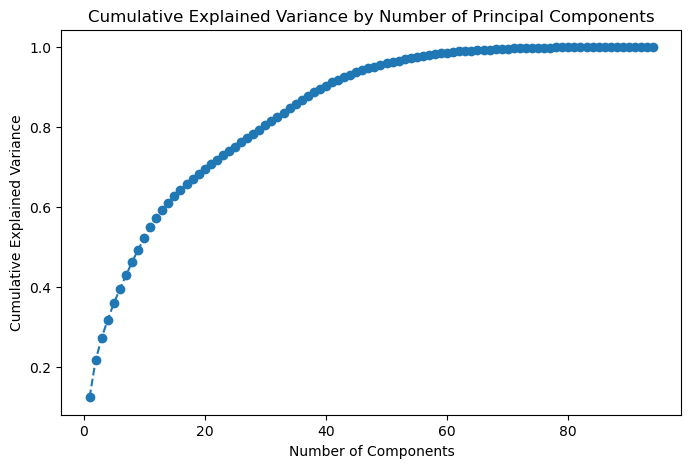

Number of components explaining 95% variance: 48


In [59]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()
n_components = np.argmax(pca.explained_variance_ratio_.cumsum() >= 0.95) + 1
print(f"Number of components explaining 95% variance: {n_components}")

In [60]:
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [61]:
log_reg = LogisticRegression()
log_reg.fit(X_train_pca, y_train)

c:\Users\matth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
y_pred = log_reg.predict(X_test_pca)

In [63]:
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.53      0.68     25585
         1.0       0.07      0.60      0.13      1513

    accuracy                           0.54     27098
   macro avg       0.51      0.56      0.40     27098
weighted avg       0.91      0.54      0.65     27098

Confusion Matrix:
 [[13608 11977]
 [  610   903]]
Accuracy: 0.5355007749649421


After using PCA, model accuracy has improved slightly by 0.002. However, there is a decrease in Recall for Class 1.0 (Fraud) which is not beneficial for the business as we want ensure more fraud cases are caught.

## GridSearchCV

### Finding best parameters

In [64]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000]
}

log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='recall', verbose=0)
grid_search.fit(X_train_pca, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

c:\Users\matth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\matth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best Parameters: {'C': 10, 'max_iter': 500, 'penalty': 'l2'}
Best Score: 0.7671825848022558


### Using Best Parameters

In [65]:
log_reg = LogisticRegression(C=1, max_iter=500, penalty='l2')
log_reg.fit(X_train_pca, y_train)
y_pred = log_reg.predict(X_test_pca)

In [66]:
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.53      0.68     25585
         1.0       0.07      0.60      0.13      1513

    accuracy                           0.54     27098
   macro avg       0.51      0.56      0.40     27098
weighted avg       0.91      0.54      0.65     27098

Confusion Matrix:
 [[13608 11977]
 [  611   902]]
Accuracy: 0.5354638718724629
